# Facebookデータを使ったLognormal分布の最尤推定

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import math
from scipy.optimize import differential_evolution

plt.rcParams['font.family'] = 'Hiragino Maru Gothic Pro'

In [2]:
## Dowload facebook data from "https://www.kaggle.com/code/roshni27s/facebook-data-analysis"
df = pd.read_csv('./pseudo_facebook.csv')

## Facebookデータの前処理

<AxesSubplot: xlabel='dob_year', ylabel='Count'>

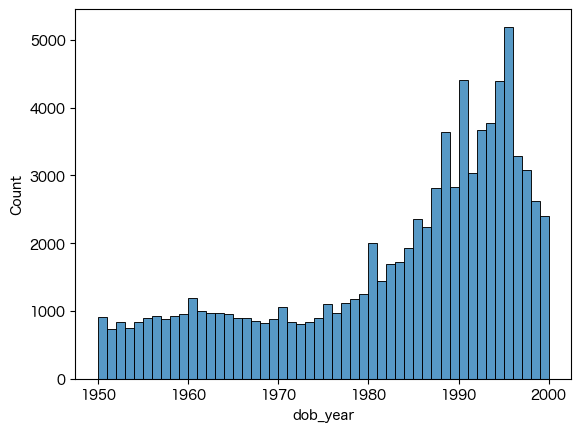

In [3]:
df = df[df['dob_year'] >= 1950]
sns.histplot(df['dob_year'], binwidth=1)

<AxesSubplot: xlabel='tenure', ylabel='Count'>

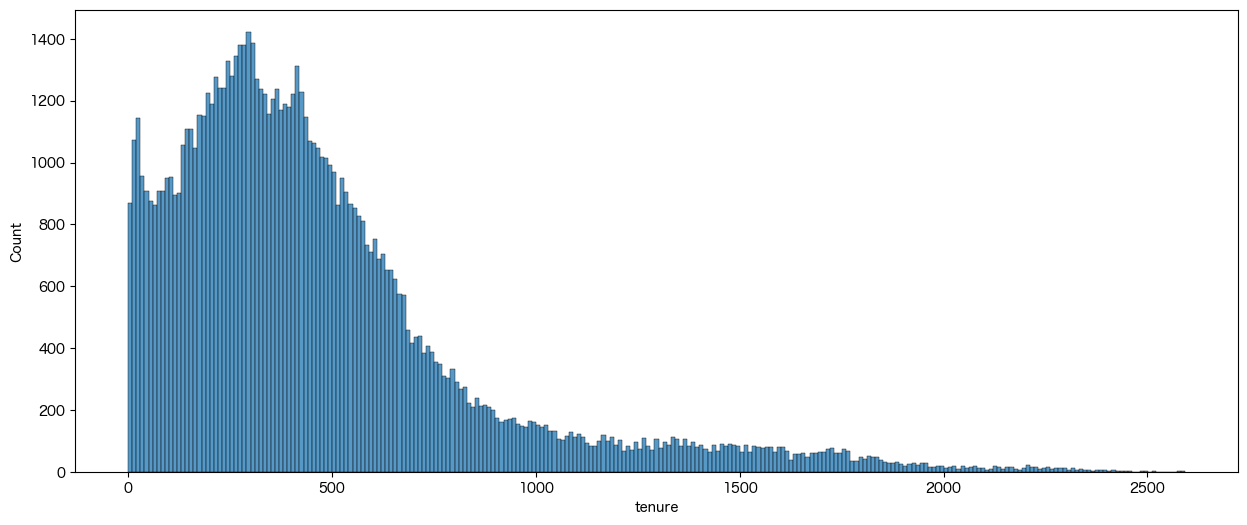

In [4]:
plt.figure(figsize=(15,6))
sns.histplot(df['tenure'], binwidth=10)

(0.0, 500.0)

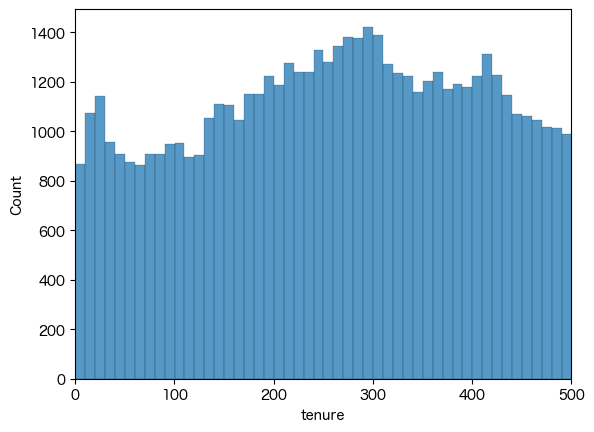

In [5]:
sns.histplot(df['tenure'], binwidth=10)
plt.xlim(0, 500)

In [6]:
df = df[df['tenure'] >= 100]

In [7]:
min_likes = 100
df = df[(df['likes'] >= min_likes) & (df['likes_received'] >= min_likes)]

<AxesSubplot: xlabel='likes', ylabel='Count'>

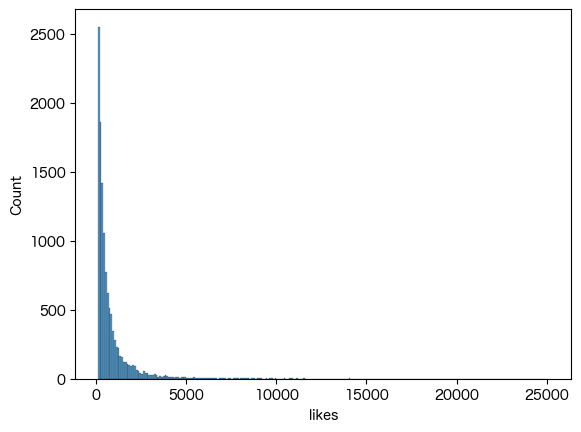

In [8]:
sns.histplot(df['likes'], binwidth=100)

<AxesSubplot: xlabel='likes', ylabel='Count'>

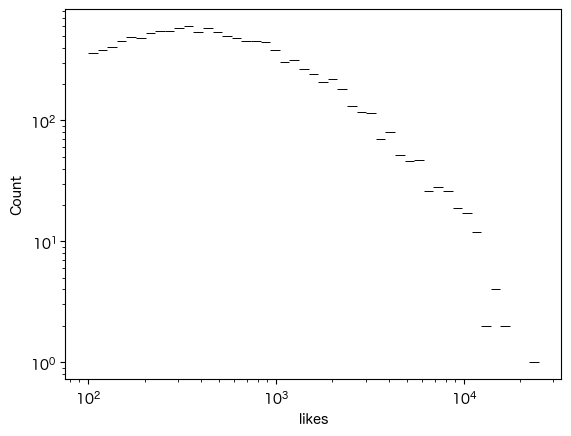

In [9]:
sns.histplot(df['likes'], log_scale=(True, True))

In [10]:
def normalize_micro(series, num_min):  # あるxのseriesの中で頻度がnum_minとなるxの最大値をx_maxとしたとき、x_max > x となるxを削除する。
    _counts = series.value_counts()
    print(_counts.keys().max())
    _max = _counts[_counts.values == num_min].keys().max()
    print(_max)
    return series < _max

In [11]:
df = df[normalize_micro(df['likes'], 2)]

25111
10803


<AxesSubplot: xlabel='likes', ylabel='Count'>

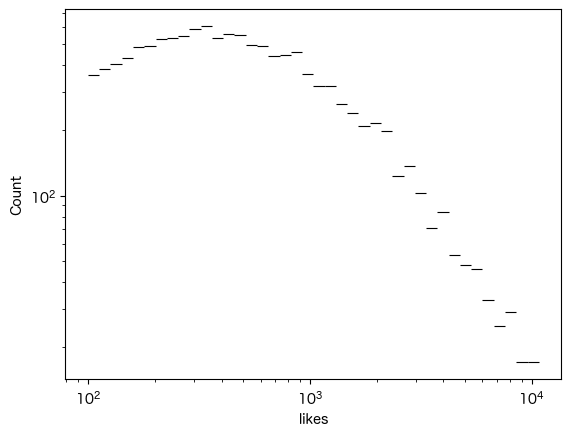

In [12]:
sns.histplot(df['likes'], log_scale=(True, True))

<AxesSubplot: xlabel='likes_received', ylabel='Count'>

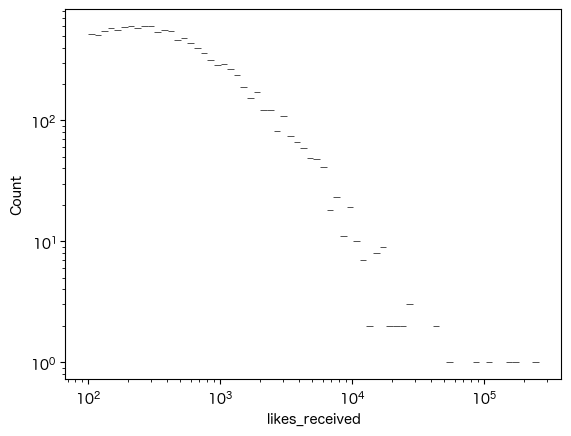

In [13]:
sns.histplot(df['likes_received'], log_scale=(True, True))

In [14]:
df = df[normalize_micro(df['likes_received'], 2)]

261197
5895


<AxesSubplot: xlabel='likes_received', ylabel='Count'>

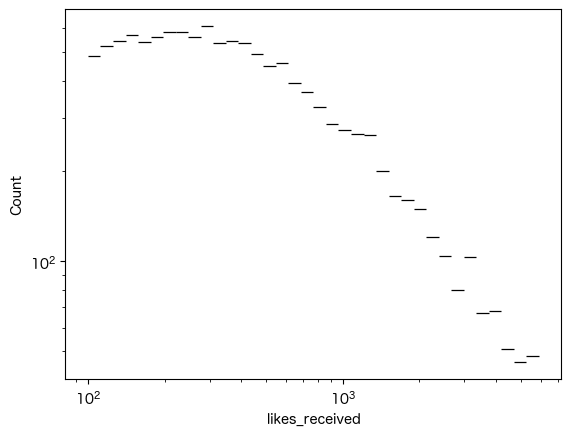

In [15]:
sns.histplot(df['likes_received'], log_scale=(True, True))

<AxesSubplot: xlabel='friend_count', ylabel='Count'>

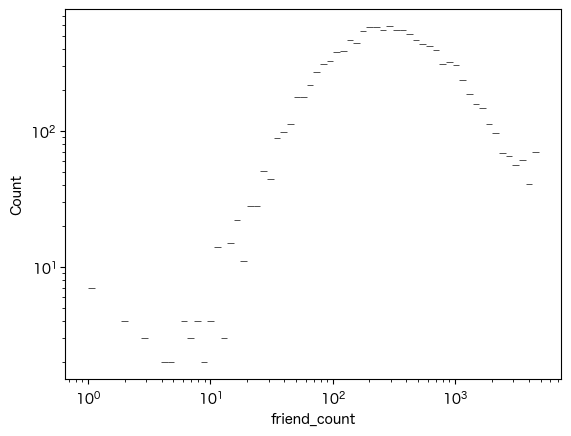

In [16]:
sns.histplot(df['friend_count'], log_scale=(True, True))

(0.0, 30.0)

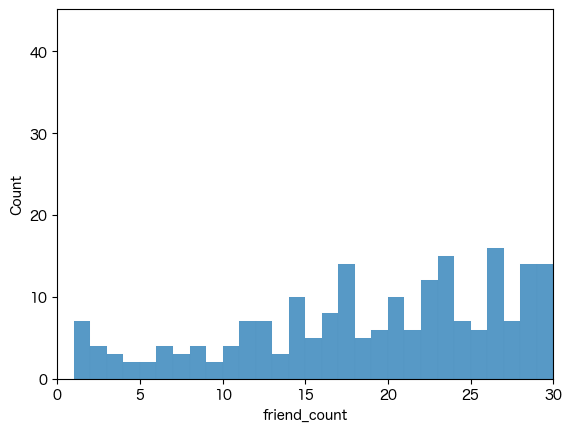

In [17]:
sns.histplot(df['friend_count'], binwidth=1)
plt.xlim(0, 30)

4845
2697


<AxesSubplot: xlabel='friend_count', ylabel='Count'>

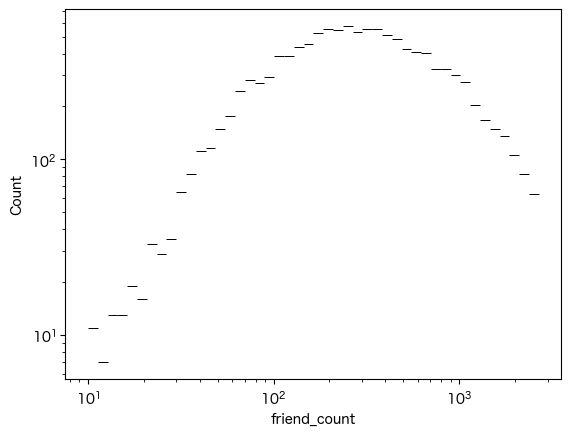

In [18]:
min_friend = 10
df = df[df['friend_count'] >= min_friend]
df = df[normalize_micro(df['friend_count'], 3)]
sns.histplot(df['friend_count'], log_scale=(True, True))

<AxesSubplot: xlabel='friend_count', ylabel='Count'>

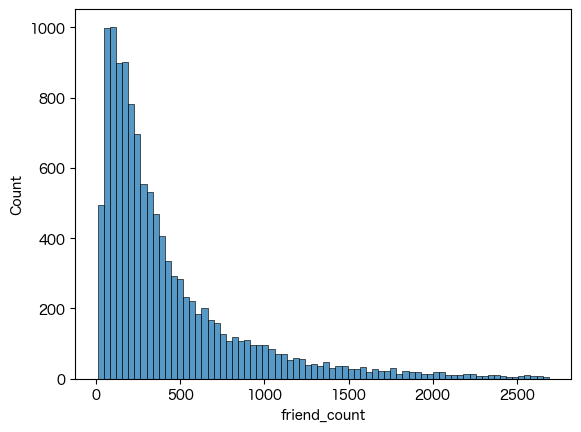

In [19]:
sns.histplot(df['friend_count'])

In [20]:
df.describe()

,userid,age,dob_day,dob_year,dob_month,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,1.182100e+04,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000,11821.000000
mean,1.599847e+06,30.564250,15.295153,1982.435750,6.460198,648.595973,431.381440,235.698926,749.296929,607.890111,520.774300,354.837746,228.522206,253.052280
std,3.437158e+05,14.361982,8.836287,14.361982,3.428438,480.246555,448.596619,253.049796,975.510408,762.367974,816.905165,491.645188,509.997448,382.297126
min,1.000008e+06,13.000000,1.000000,1950.000000,1.000000,100.000000,10.000000,1.000000,100.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,1.302407e+06,19.000000,8.000000,1971.000000,3.000000,309.000000,137.000000,70.000000,223.000000,188.000000,124.000000,103.000000,0.000000,61.000000
50%,1.598727e+06,25.000000,15.000000,1988.000000,7.000000,495.000000,273.000000,148.000000,416.000000,337.000000,262.000000,187.000000,43.000000,126.000000
75%,1.903238e+06,42.000000,23.000000,1994.000000,9.000000,801.000000,552.000000,305.000000,855.000000,677.000000,574.000000,390.000000,231.000000,278.000000
max,2.193468e+06,63.000000,31.000000,2000.000000,12.000000,2592.000000,2690.000000,2201.000000,10773.000000,5884.000000,10748.000000,5369.000000,7879.000000,5672.000000


In [21]:
pd.isnull(df).all()

userid                   False
age                      False
dob_day                  False
dob_year                 False
dob_month                False
gender                   False
tenure                   False
friend_count             False
friendships_initiated    False
likes                    False
likes_received           False
mobile_likes             False
mobile_likes_received    False
www_likes                False
www_likes_received       False
dtype: bool

## Lognormal分布の最尤推定

In [22]:
seed = 2023
def optimizer(fun, bounds):
    return differential_evolution(fun, bounds, strategy='best2bin',
                                  seed=seed)

bounds={'s':(0,10), 'loc':0, 'scale':(200,300)}
res = stats.fit(stats.lognorm, np.array(df['friend_count'].values), bounds=bounds, optimizer=optimizer)
sigma, loc, scale = res.params
mu = math.log(scale)
mode = math.exp(mu - sigma**2)
print(res.params)
print('mu ', mu)
print('mode', mode)
print('sigma', sigma)

FitParams(s=1.0045192699090553, loc=0.0, scale=269.8684716699013)
mu  5.5979346983428515
mode 98.38375851805874
sigma 1.0045192699090553


<AxesSubplot: title={'center': 'Fitted $\\tt lognorm$ PDF and Histogram'}, xlabel='x', ylabel='PDF'>

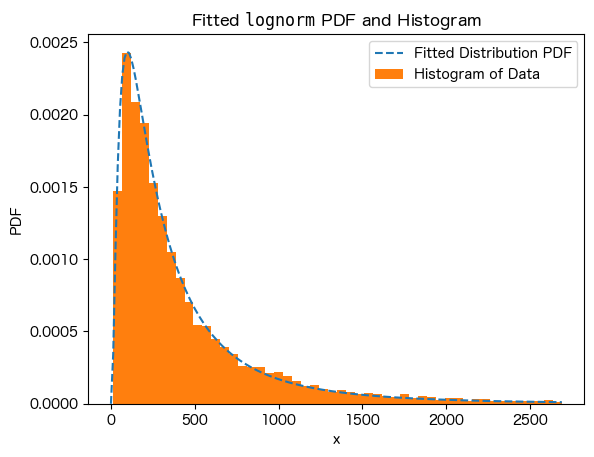

In [23]:
res.plot()

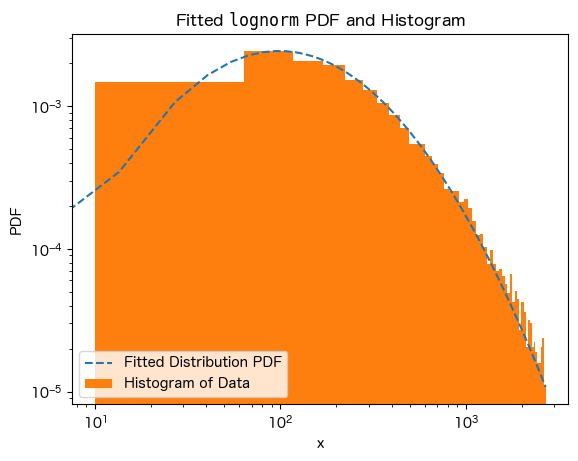

In [24]:
res.plot()
plt.xscale('log')
plt.yscale('log')

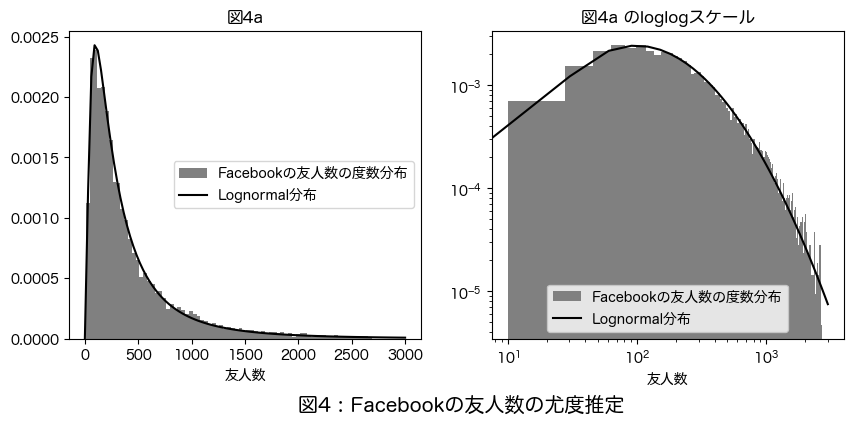

In [25]:
x = np.linspace(0,3000,100)
dist = stats.lognorm(s=res.params.s, loc=res.params.loc, scale=res.params.scale)

fig = plt.figure(figsize=(10, 4))

ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax1.set_title('図4a')
ax2.set_title('図4a のloglogスケール')
ax1.set_xlabel('友人数')
ax2.set_xlabel('友人数')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax1.text(2000, -0.0006, "図4 : Facebookの友人数の尤度推定", size='x-large')

ax1.hist(df['friend_count'], bins=75, label='Facebookの友人数の度数分布', density=True, color='grey')
ax1.plot(x, dist.pdf(x), c='black', label='Lognormal分布')
ax2.hist(df['friend_count'], bins=150, label='Facebookの友人数の度数分布', density=True, color='grey')
ax2.plot(x, dist.pdf(x), c='black', label='Lognormal分布')

ax1.legend(loc = 'right') 
ax2.legend(loc = 'lower center') 

plt.savefig("images/fig4.png", bbox_inches='tight')